In [ ]:
###NOTE: access of cirq circuits thorugh pickle files works only with python 3.9.12 kernel

In [1]:
pip install -e ../../cirq_tools/

Obtaining file:///Users/luismartinezmartinez/Documents/QuEra/GitProjs/cirq_tools
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Cloning https://github.com/QuEraComputing/bloqade-circuit.git (to revision main) to /private/var/folders/rm/xdxcjr7n7_13f9m1905zyf6c0000gq/T/pip-install-xf1gp5if/bloqade-circuit_84fea30746af475ca87179c7b6e0fc43
  Running command git clone --filter=blob:none --quiet https://github.com/QuEraComputing/bloqade-circuit.git /private/var/folders/rm/xdxcjr7n7_13f9m1905zyf6c0000gq/T/pip-install-xf1gp5if/bloqade-circuit_84fea30746af475ca87179c7b6e0fc43
  Resolved https://github.com/QuEraComputing/bloqade-circuit.git to commit c2157d919cbf0ef861c3d43fd5177882c1dc56d3
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cac

In [3]:
#pip install --no-cache-dir --force-reinstall git+https://github.com/QuEraComputing/bloqade-circuit

In [4]:
#pip install bloqade-circuit==0.5.0

In [2]:
import numpy as np 
import nmrfuncs
import sys, os
from scipy.io import savemat, loadmat
import cirq
from timeit import default_timer as timer
import importlib

###Simulation with cirq_heurstic noise model...
#import sys
#sys.path.append('../../cirq_tools/noisy_simulation/')
#from noisy_simulation.cirq_utils import get_two_zoned_noisy_circ, optimize_circuit_to_cz_gate_set





In [ ]:
def decompose_xxpow(q0, q1, exponent):
    theta = np.pi * exponent
    return cirq.Circuit([
        cirq.Moment([cirq.H(q0), cirq.H(q1)]),
        cirq.Moment([cirq.CNOT(q0, q1)]),
        cirq.Moment([cirq.rz(-theta)(q1)]),
        cirq.Moment([cirq.CNOT(q0, q1)]),
        cirq.Moment([cirq.H(q0), cirq.H(q1)])
    ]).moments

def replace_xxpow_gates(circuit):
    new_circuit = cirq.Circuit()
    for moment in circuit:
        buffer = []
        for op in moment.operations:
            if isinstance(op.gate, cirq.XXPowGate):
                q0, q1 = op.qubits
                xx_decomp = decompose_xxpow(q0, q1, op.gate.exponent)
                buffer.append(xx_decomp)
            else:
                buffer.append([cirq.Moment([op])])
        
        
        if buffer:
            for i in range(max(len(x) for x in buffer)):
                ops = []
                for branch in buffer:
                    if i < len(branch):
                        ops.extend(branch[i].operations)
                if ops:
                    new_circuit.append(cirq.Moment(ops))
    return new_circuit




In [69]:
#####Saving pickle circuits in json format and in CX + sq rot gates....
from nmrfuncs import load_circuit
from pathlib import Path

folder_path = Path("./zf_ion")  # e.g., Path("./data")
json_root = Path("./zf_ion_json")  # e.g., Path("./data_json")

# Iterate over all .pickle files in this folder (non-recursive)
for file in folder_path.glob("*.pickle"):
    circ = load_circuit(file,json_format=False)
    #print(json_root / file.with_suffix('.json').name)
    cirq.to_json(replace_xxpow_gates(circ), json_root / file.with_suffix('.json').name)



In [65]:
test_circ = load_circuit('./zf_ion/U_t_3125.pickle',json_format=False)

In [66]:
rewritten_circ = replace_xxpow_gates(test_circ)

In [67]:
sim = cirq.Simulator()

res_ref = sim.simulate(test_circ)

res_rewritten = sim.simulate(rewritten_circ)

In [68]:
np.abs(np.vdot(res_ref.final_state_vector,res_rewritten.final_state_vector))

np.float32(1.0)

In [53]:
res.final_state_vector

array([ 9.95966733e-01-8.9721009e-02j,  6.01285137e-08+5.3085387e-08j,
       -1.05910324e-07+3.0595231e-08j, -8.79710456e-08+2.9417846e-08j,
       -1.15286474e-08+1.1307753e-07j, -2.26016734e-08+3.2167538e-08j,
       -1.45910262e-08+8.8550740e-09j,  1.59570881e-08+2.2549909e-09j,
       -7.35713570e-08-1.0667912e-08j,  8.79896263e-08+4.1011944e-08j,
       -2.65634021e-08+5.7481682e-08j, -1.71103203e-08+1.0852424e-07j,
       -5.84599640e-08+1.0452232e-08j,  6.66178508e-08-4.7511477e-08j,
        1.08095728e-08-7.7578637e-09j, -8.38348697e-08+5.8328022e-09j],
      dtype=complex64)

In [ ]:
#pip install -e ../../cirq_tools/

Obtaining file:///Users/luismartinezmartinez/Documents/QuEra/GitProjs/cirq_tools
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Cloning https://github.com/QuEraComputing/bloqade-circuit.git (to revision main) to /private/var/folders/rm/xdxcjr7n7_13f9m1905zyf6c0000gq/T/pip-install-dl3li30a/bloqade-circuit_0c86a4bf985a4f7bab1cf982fa3af028
  Running command git clone --filter=blob:none --quiet https://github.com/QuEraComputing/bloqade-circuit.git /private/var/folders/rm/xdxcjr7n7_13f9m1905zyf6c0000gq/T/pip-install-dl3li30a/bloqade-circuit_0c86a4bf985a4f7bab1cf982fa3af028
  Resolved https://github.com/QuEraComputing/bloqade-circuit.git to commit c2157d919cbf0ef861c3d43fd5177882c1dc56d3
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cac

In [ ]:
#pip install --no-cache-dir --force-reinstall git+https://github.com/QuEraComputing/bloqade-circuit

In [2]:
###ffunction to compute FID using our QuEra's noise model...
from nmrfuncs import SzTot_weighted_obs, responseFunc_sample, addDepolarizingNoise, ZULF_circuitList

def ZULF_noisySim_QuEra(t_ind_List, path, nmr_reg, weights, repetitions):
    simulator = cirq.DensityMatrixSimulator()
    responseFunc = []
    SzTot = np.array(SzTot_weighted_obs(len(nmr_reg), weights))
    for indt, t_ind in enumerate(t_ind_List):
        circuitList, SzTot_comp = ZULF_circuitList(t_ind, path, nmr_reg, SzTot)
        state_prob_list = []
        for circuit in circuitList:
            noisy_circuit = get_two_zoned_noisy_circ(optimize_circuit_to_cz_gate_set(circuit)) #addDepolarizingNoise(circuit, p1q, p2q)
            noisy_circuit.append([cirq.measure(*nmr_reg, key='measure_all')])
            run_result = simulator.run(program=noisy_circuit, repetitions=repetitions)
            histogram = run_result.histogram(key='measure_all')
            avg_pop = np.array([histogram[i] for i in range(int(2**len(nmr_reg)))])/repetitions
            state_prob_list.append(avg_pop)
#         print(indt)
        responseFunc.append(responseFunc_sample(state_prob_list, SzTot, SzTot_comp, len(nmr_reg)))
    return responseFunc



In [3]:
###Testing the noise model fo get the FIDs...
num_qubits = 4
nmr_reg = [cirq.LineQubit(int(i)) for i in range(num_qubits)]
#spinach_datapath = '/Users/kis/Dropbox/NMR Learning/Code/matlab/spectrumSim/fid_data/'
#path = "evolution_circuits/acetonitrile/zf_ion/"
path = "./zf_ion_json/"
# npoints = 4096
npoints = 100
t_ind_List = np.array([i for i in range(npoints)]).astype(float)
# t_ind_List = np.arange(0,4096,0.5,dtype=float)
gamma_1H = 2.6752 * 1e8; gamma_13C = 0.6728 * 1e8
weights = np.array([gamma_1H, gamma_1H, gamma_1H, gamma_13C]) / gamma_1H
repetitions = 1000; p1q = 0.001; p2q = 0.02

start = timer()

fid_raw = ZULF_noisySim_QuEra(t_ind_List, path, nmr_reg, weights,repetitions=100)
# savemat(spinach_datapath + 'fidraw_acetonitrile_zf_qalg_npoints_{:d}_syn_ion.mat'.format(npoints), {'fid_raw_zf_qalg': fid_raw}, oned_as='column')
print(fid_raw)


/Users/luismartinezmartinez/pyenvs/qiskit1.1/lib/python3.11/site-packages/cirq/circuits/circuit_operation.py:173: FutureWarning: In cirq 1.6 the default value of `use_repetition_ids` will change to
`use_repetition_ids=False`. To make this warning go away, please pass
explicit `use_repetition_ids`, e.g., to preserve current behavior, use

  CircuitOperations(..., use_repetition_ids=True)
  warnings.warn(msg, FutureWarning)
/Users/luismartinezmartinez/pyenvs/qiskit1.1/lib/python3.11/site-packages/cirq/circuits/circuit_operation.py:173: FutureWarning: In cirq 1.6 the default value of `use_repetition_ids` will change to
`use_repetition_ids=False`. To make this warning go away, please pass
explicit `use_repetition_ids`, e.g., to preserve current behavior, use

  CircuitOperations(..., use_repetition_ids=True)
  warnings.warn(msg, FutureWarning)
/Users/luismartinezmartinez/pyenvs/qiskit1.1/lib/python3.11/site-packages/cirq/circuits/circuit_operation.py:173: FutureWarning: In cirq 1.6 the def

ValueError: Could not resolve type 'MSGate' during deserialization

In [16]:
cirq.read_json('./zf_ion_json/U_t_1237.json')

ValueError: Could not resolve type 'MSGate' during deserialization

In [ ]:
###Transforming all circuits to json format for compatibility considerations in more recent versions of cirq...
#cirq.to_json?
#from pathlib import Path

#folder_path = Path("./zf_ion")  # e.g., Path("./data")
#json_root = Path("./zf_ion_json")  # e.g., Path("./data_json")

# Iterate over all .pickle files in this folder (non-recursive)
#for file in folder_path.glob("*.pickle"):
#    circ = load_circuit(file)
    #print(json_root / file.with_suffix('.json').name)
#    cirq.to_json(circ, json_root / file.with_suffix('.json').name)

In [6]:
from cirq import ops

importlib.reload(nmrfuncs)
num_qubits = 4
nmr_reg = [cirq.LineQubit(int(i)) for i in range(num_qubits)]
spinach_datapath = '/Users/kis/Dropbox/NMR Learning/Code/matlab/spectrumSim/fid_data/'
#path = "evolution_circuits/acetonitrile/zf_ion/"
path = "./zf_ion/"
# npoints = 4096
npoints = 100
t_ind_List = np.array([i for i in range(npoints)]).astype(float)
# t_ind_List = np.arange(0,4096,0.5,dtype=float)
gamma_1H = 2.6752 * 1e8; gamma_13C = 0.6728 * 1e8
weights = np.array([gamma_1H, gamma_1H, gamma_1H, gamma_13C]) / gamma_1H
repetitions = 1000; p1q = 0.001; p2q = 0.02

start = timer()

fid_raw = nmrfuncs.ZULF_noiselessSim(t_ind_List, path, nmr_reg, weights,json_format=False)
# savemat(spinach_datapath + 'fidraw_acetonitrile_zf_qalg_npoints_{:d}_syn_ion.mat'.format(npoints), {'fid_raw_zf_qalg': fid_raw}, oned_as='column')
print(fid_raw)

# fid_raw = nmrfuncs.ZULF_snSim(t_ind_List, path, nmr_reg, weights, repetitions)
# savemat(spinach_datapath + 'fidraw_acetonitrile_zf_qalg_npoints_{:d}_syn_ion_sn_{:d}.mat'.format(npoints,repetitions), {'fid_raw_zf_qalg': fid_raw}, oned_as='column')

# fid_raw = nmrfuncs.ZULF_decohSim(t_ind_List, path, nmr_reg, weights, p1q, p2q)
# savemat(spinach_datapath + 'fidraw_acetonitrile_zf_qalg_npoints_{:d}_syn_ion_depol1q_{:.3f}_depol2q_{:.3f}.mat'.format(npoints,p1q,p2q), {'fid_raw_zf_qalg_decoh': fid_raw}, oned_as='column')

# fid_raw = nmrfuncs.ZULF_decohSim_fill(t_ind_List, path, nmr_reg, weights, p1q, p2q)
# savemat(spinach_datapath + 'fidraw_acetonitrile_zf_qalg_npoints_{:d}_syn_ion_depol1q_{:.3f}_depol2q_{:.3f}_fill.mat'.format(npoints,p1q,p2q), {'fid_raw_zf_qalg_decoh': fid_raw}, oned_as='column')

# p = 0.005
# fid_raw = nmrfuncs.ZULF_dampSim(t_ind_List, path, nmr_reg, weights, p)
# savemat(spinach_datapath + 'fidraw_acetonitrile_zf_qalg_npoints_{:d}_syn_ion_amplitudedamp_{:.3f}.mat'.format(npoints,p), {'fid_raw_zf_qalg_decoh': fid_raw}, oned_as='column')

# fid_raw = nmrfuncs.ZULF_noisySim(t_ind_List, path, nmr_reg, weights, repetitions, p1q, p2q)
# savemat(spinach_datapath + 'fidraw_acetonitrile_zf_qalg_npoints_{:d}_syn_ion_sn_{:d}_depol1q_{:.3f}_depol2q_{:.3f}.mat'.format(npoints,repetitions,p1q,p2q), {'fid_raw_zf_qalg_decoh': fid_raw}, oned_as='column')

# M = 256
# t_ind_List_NUS_zf = np.loadtxt('../matlab/spectrumSim/zulf_masks/sampleMask_N_4096_M_{:d}_stretchFac_0.5'.format(M), dtype=float).astype(int)
# t_ind_List_NUS_ulf = np.loadtxt('../matlab/spectrumSim/zulf_masks/sampleMask_N_4096_M_{:d}_stretchFac_0.5'.format(M), dtype=float).astype(int)
# fid_raw = nmrfuncs.ZULF_noisySim_MC(t_ind_List_NUS_zf, path, nmr_reg, weights, repetitions, p1q, p2q)
# savemat(spinach_datapath + 'fidraw_acetonitrile_zf_qalg_npoints_{:d}_syn_ion_sn_{:d}_depol1q_{:.3f}_depol2q_{:.3f}_NUS_{:d}.mat'.format(npoints,repetitions,p1q,p2q,M), {'fid_raw_zf_qalg_NUS': fid_raw}, oned_as='column')

print(timer()-start)

[np.float64(0.7658124608310821), np.float64(0.666467387570288), np.float64(0.6679043427949949), np.float64(0.6784709436330963), np.float64(0.654357831252032), np.float64(0.763792467955904), np.float64(0.683534448339187), np.float64(0.65706051718288), np.float64(0.6865924422833602), np.float64(0.6448802828290069), np.float64(0.7544649370895066), np.float64(0.7047896141973856), np.float64(0.646558005893343), np.float64(0.6940127733728176), np.float64(0.6403172799791168), np.float64(0.7423105865480365), np.float64(0.7238343053813944), np.float64(0.6420147511505332), np.float64(0.6956621291938355), np.float64(0.6407004674787149), np.float64(0.7283238499447067), np.float64(0.7400796988100041), np.float64(0.6399459501027304), np.float64(0.6940882199265999), np.float64(0.6454242929668605), np.float64(0.707342876630651), np.float64(0.7549578593647147), np.float64(0.6434608926248375), np.float64(0.688638590597954), np.float64(0.6552568179369959), np.float64(0.6857731184667111), np.float64(0.764

In [31]:
from nmrfuncs import load_circuit

test_circ = load_circuit('./zf_ion/U_t_3990.pickle',json_format=False)


In [32]:
test_circ

q_0: ───X^0.016────Z^0.236───────MS(-0.059π)───X^0.839────Z^0.449───────MS(0.0425π)───X^0.796────Z^0.343───────MS(0.0665π)───X^-0.864───Z^0.449────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────MS(0.073π)───X^(-3/13)───Z^0.826───────MS(0.0665π)───X^0.647───Z^0.623───────MS(0.04π)───X^-0.465───Z^0.507────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────MS(0.223π)───X^0.226────Z^0.127───────MS(-0.207π)───X^0.57──────Z^0.137───────MS(0.184π)───X^0.141────Z^0.581───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────MS(-0.106π)───X^0.633────Z^0.257───────MS(0.0865π)───X^-0.686───Z^0.317───────MS(0.0895π)───X^-0.233───Z^0.699───────X^0.328───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
                                 │                                      │                                      │                                                                                                                                                           │                                      │                                     │                                                                                                                                                     │                                     │                                       │                                                                                                                                                                 │                                      │                                      │
q_1: ───X^0.055────Z^0.431───────┼──────────────────────────────────────┼──────────────────────────────────────┼──────────────────────────────────────MS(0.0835π)───X^0.991────Z^0.531───────MS(-0.066π)───X^0.291────Z^0.435───────MS(0.085π)───X^(-1/8)────Z^(5/8)───────┼──────────────────────────────────────┼─────────────────────────────────────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┼─────────────────────────────────────┼───────────────────────────────────────┼─────────────────────────────────────MS(0.213π)───X^-0.737─────Z^0.68────────MS(0.165π)───X^(-3/11)───Z^0.311───────MS(-0.23π)───X^-0.677────Z^0.218───X^-0.14───┼──────────────────────────────────────┼──────────────────────────────────────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
                                 │                                      │                                      │                                      │                                      │                                      │                                      │                                      │                                     │                                                                                                                                                     │                                     │                                       │                                     │                                       │                                      │                                            │                                      │                                      │
q_2: ───X^(1/12)───Z^0.697───────┼──────────────────────────────────────┼──────────────────────────────────────┼──────────────────────────────────────┼──────────────────────────────────────┼──────────────────────────────────────┼──────────────────────────────────────┼──────────────────────────────────────┼─────────────────────────────────────┼────────────────────────────────────MS(0.234π)───X^(9/11)───Z^0.254────

In [33]:
replace_xxpow_gates(test_circ)

ValueError: Overlapping operations: (cirq.H(cirq.NamedQubit('q_0')), cirq.H(cirq.NamedQubit('q_3')), cirq.CNOT(cirq.NamedQubit('q_0'), cirq.NamedQubit('q_3')), cirq.Rz(rads=0.3712738819128525).on(cirq.NamedQubit('q_3')), cirq.CNOT(cirq.NamedQubit('q_0'), cirq.NamedQubit('q_3')), cirq.H(cirq.NamedQubit('q_3')), cirq.H(cirq.NamedQubit('q_0')))

In [29]:
replace_xxpow_gates(cirq.Circuit(test_circ[3]))

ValueError: Overlapping operations: (cirq.H(cirq.NamedQubit('q_0')), cirq.H(cirq.NamedQubit('q_3')), cirq.CNOT(cirq.NamedQubit('q_0'), cirq.NamedQubit('q_3')), cirq.Rz(rads=0.3712738819128525).on(cirq.NamedQubit('q_3')), cirq.CNOT(cirq.NamedQubit('q_0'), cirq.NamedQubit('q_3')), cirq.H(cirq.NamedQubit('q_0')), cirq.H(cirq.NamedQubit('q_3')))

In [11]:
cirq.optimize_for_target_gateset(
                circuit=test_circ, gateset=cirq.CZTargetGateset()
            )

AttributeError: module 'cirq' has no attribute 'optimize_for_target_gateset'

In [14]:
import cirq

# Define qubits
q0, q1 = cirq.LineQubit.range(2)

# Example circuit with arbitrary gates
circuit = cirq.Circuit(
    cirq.H(q0),
    cirq.CNOT(q0, q1),
    cirq.X(q1)
)

print("Original circuit:")
print(test_circ)

# Strategy: decompose everything to 1Q + CZ
decomposed = cirq.Circuit()

for op in test_circ.all_operations():
    decomposed += cirq.decompose(op, keep=lambda g: isinstance(g.gate, (cirq.Gate)) and
                                  (cirq.num_qubits(g.gate) == 1 or isinstance(g.gate, cirq.CZPowGate)))

print("\nDecomposed to 1Q + CZ:")
print(decomposed)


Original circuit:
q_0: ───X^0.016────Z^0.236───────MS(-0.059π)───X^0.839────Z^0.449───────MS(0.0425π)───X^0.796────Z^0.343───────MS(0.0665π)───X^-0.864───Z^0.449────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────MS(0.073π)───X^(-3/13)───Z^0.826───────MS(0.0665π)───X^0.647───Z^0.623───────MS(0.04π)───X^-0.465───Z^0.507────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────MS(0.223π)───X^0.226────Z^0.127───────MS(-0.207π)───X^0.57──────Z^0.137───────MS(0.184π)───X^0.141────Z^0.581───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────MS(-0.106π)───X^0.633────Z^0.257───────MS(0.0865π)───X^-0.686───Z^0.317───────MS(0.0895π)───X^-0.233───Z^0.699───────X^0.328───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
    

ValueError: Operation doesn't satisfy the given `keep` but can't be decomposed: cirq.ms(-0.11818014709469422*np.pi/2).on(cirq.NamedQubit('q_0'), cirq.NamedQubit('q_3'))

In [15]:
cirq.ms

<function cirq.ion.ion_gates.ms(rads: float) -> cirq.ion.ion_gates.MSGate>

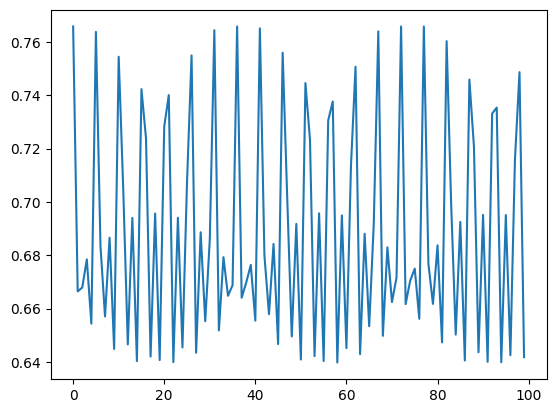

In [7]:
import matplotlib.pyplot as plt
plt.plot(fid_raw)
plt.show()

In [5]:
from nmrfuncs import load_circuit

load_circuit('./zf_ion/U_t_1009.pickle')

┌───────────────────┐
q_0: ───X^0.088────Z^0.878───────MS(0.187π)───X^0.482────Z^(2/11)───────MS(-0.199π)───X^-0.869───Z^0.579───────MS(0.086π)───X^-0.053───Z^0.404──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────MS(-0.0425π)───X^0.986────Z^0.31─────────MS(0.044π)───X^-0.652───Z^0.605───────MS(-0.037π)───X^-0.055───Z^(3/14)─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────MS(-0.129π)───X^-0.058────Z^0.243───────MS(0.12π)───X^-0.75────Z^0.523─────────MS(-0.0835π)───X^(-6/7)───Z^(1/7)────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────MS(-0.112π)────────────X^0.019────Z^0.238───────MS(0.201π)───X^0.702───Z^0.145───────MS(0.249π)───X^-0.524───Z^0.451───────X^0.327───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
                                 │                                      │                                      │                                                                                                                                                        │                                        │                                     │                                                                                                                                                         │                                       │                                      │                                                                                                                                                                │                                               │                                    │
q_1: ───X^-0.183───Z^0.247───────┼──────────────────────────────────────┼──────────────────────────────────────┼─────────────────────────────────────MS(-0.188π)───X^-0.007───Z^0.261───────MS(-0.112π)───X^0.185───Z^0.652───────MS(0.138π)───X^-0.558───Z^0.686───────┼────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┼───────────────────────────────────────┼──────────────────────────────────────┼───────────────────────────────────────MS(-0.19π)───X^0.353─────Z^0.665───────MS(-0.227π)───X^(-4/15)───Z^0.619───────MS(-0.167π)───X^-0.543────Z^(7/13)────────┼──────────X^-0.904─────────────────────────────┼────────────────────────────────────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
                                 │                                      │                                      │                                     │                                      │                                     │                                     │                                        │                                     │                                                                                                                                                         │                                       │                                      │                                       │                                      │                                       │                                         │                                               │                                    │
q_2: ───X^0.52─────Z^0.356───────┼──────────────────────────────────────┼──────────────────────────────────────┼─────────────────────────────────────┼──────────────────────────────────────┼─────────────────────────────────────┼─────────────────────────────────────┼────────────────────────────────────────┼─────────────────────────────────────┼────────────

In [11]:
###Transforming all circuits to json format for compatibility considerations in more recent versions of cirq...
#cirq.to_json?
from pathlib import Path

folder_path = Path("./zf_ion")  # e.g., Path("./data")
json_root = Path("./zf_ion_json")  # e.g., Path("./data_json")

# Iterate over all .pickle files in this folder (non-recursive)
for file in folder_path.glob("*.pickle"):
    circ = load_circuit(file)
    #print(json_root / file.with_suffix('.json').name)
    cirq.to_json(circ, json_root / file.with_suffix('.json').name)


In [ ]:
cirq.to_json?

Signature:
cirq.to_json(
    obj: Any,
    file_or_fn: Union[NoneType, IO, pathlib.Path, str] = None,
    *,
    indent: int = 2,
    cls: Type[json.encoder.JSONEncoder] = <class 'cirq.protocols.json_serialization.CirqEncoder'>,
) -> Optional[str]
Docstring:
Write a JSON file containing a representation of obj.

The object may be a cirq object or have data members that are cirq
objects which implement the SupportsJSON protocol.

Args:
    obj: An object which can be serialized to a JSON representation.
    file_or_fn: A filename (if a string or `pathlib.Path`) to write to, or
        an IO object (such as a file or buffer) to write to, or `None` to
        indicate that the method should return the JSON text as its result.
        Defaults to `None`.
    indent: Pretty-print the resulting file with this indent level.
        Passed to json.dump.
    cls: Passed to json.dump; the default value of CirqEncoder
        enables the serialization of Cirq objects which implement
        the S

In [ ]:
# some numpy compatibility issues....

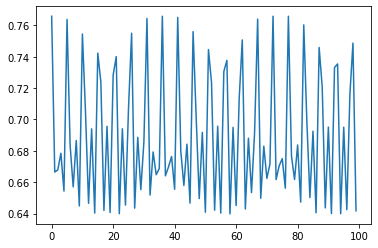

In [ ]:
import matplotlib.pyplot as plt
plt.plot(fid_raw)
plt.show()

In [ ]:
importlib.reload(nmrfuncs)
gateTime_1q = .03  # in \mu s 
gateTime_2q = .06  # in \mu s

gateCount, expTime, gateCount1q, gateCount2q = nmrfuncs.ZULF_circuitStats(t_ind_List, path, nmr_reg, weights, gateTime_1q, gateTime_2q)
print(np.mean(gateCount2q))
print(np.mean(gateCount1q))
print(np.mean(gateCount))
print(np.mean(expTime))

AttributeError: module 'nmrfuncs' has no attribute 'ZULF_circuitStats'

In [ ]:
integerList, vectorList = nmrfuncs.basisStates(num_qubits)

for ind, bint in enumerate(integerList):
    print(bint)
    benc = format(2**num_qubits - 1 - bint, '0{:d}b'.format(num_qubits))

    circuit = cirq.Circuit()
    for i in range(num_qubits):
        circuit.append(cirq.WaitGate(cirq.Duration(nanos=10**6)).on(nmr_reg[i]))
        if benc[i] == '1':
            circuit.append([cirq.rx(np.pi).on(nmr_reg[i])])
    print(np.abs(circuit.final_state_vector())**2)


15


AttributeError: module 'numpy' has no attribute 'product'

In [ ]:
importlib.reload(nmrfuncs)
path = "evolution_circuits/rotenone/"
clusterList = ['c3a', 'c5a', 'c5b', 'c1a']
NsList = [3, 5, 5, 9]
# npoints = 512
npoints = 100
t_ind_List = [i for i in range(npoints)]

fid_raw_List = []
for indc, cluster in enumerate(clusterList):
    start = timer()
    num_qubits = NsList[indc]
    nmr_reg = [cirq.LineQubit(int(i)) for i in range(num_qubits)]
    fid_raw = nmrfuncs.COSY_noiselessSim(t_ind_List, path + cluster + '/', nmr_reg)
    fid_raw_List.append(fid_raw)
    savemat(spinach_datapath + 'fidraw_rotenone_cosy_qalg_npoints_{:d}_syn_'.format(npoints) + cluster + '.mat', {'fid_raw_qalg': fid_raw}, oned_as='column')
    print(cluster, 'Time: {0}'.format(timer()-start))
fid_raw_tot = np.sum(np.array(fid_raw_List), axis=0)
savemat(spinach_datapath + 'fidraw_rotenone_cosy_qalg_npoints_{:d}_syn.mat'.format(npoints), {'fid_raw_qalg': fid_raw_tot}, oned_as='column')

In [ ]:
# from quspin.operators import hamiltonian
# from quspin.basis import spin_basis_1d

# def SzTot_weighted_obs(Nspin, weights):
#     spinBasis = spin_basis_1d(Nspin, pauli=False)
#     ham_Rz = hamiltonian([["z", [[weights[i], i] for i in np.arange(Nspin)]]], [], basis=spinBasis, dtype=np.float64, check_symm=False, check_herm=False) 
#     return np.diag(ham_Rz.todense())

# gamma_1H = 2.6752 * 1e8; gamma_13C = 0.6728 * 1e8
# weights = np.array([gamma_1H, gamma_1H, gamma_1H, gamma_13C]) / gamma_1H
# Sz_Tot = np.array(SzTot_weighted_obs(len(nmr_reg), weights))

# simulator = cirq.Simulator()
# repetitions = 1000
# state_prob_list = []
# for circuit in basisCircuitList:
#     vec = simulator.simulate(circuit).final_state_vector
#     avg_pop = np.abs(vec)**2
#     state_prob_list.append(avg_pop)
# SzList = np.sum(np.multiply(Sz_Tot[:, None], np.transpose(np.array(state_prob_list))), axis=0)
# print(SzList)

In [ ]:
circuit = cirq.Circuit()
num_qubits = 4
nmr_reg = [cirq.LineQubit(int(i)) for i in range(num_qubits)]
circuit.append(cirq.CNOT(nmr_reg[0],nmr_reg[1]))
circuit.append(cirq.rx(0.1*np.pi).on(nmr_reg[0]))
circuit.append(cirq.CNOT(nmr_reg[1],nmr_reg[2]))
circuit.append(cirq.rx(0.1*np.pi).on(nmr_reg[2]))
# circuit.append(cirq.depolarize(p=p2q,n_qubits=2).on(nmr_reg[0],nmr_reg[1]))
# circuit.append(cirq.depolarize(p=p1q,n_qubits=1).on(nmr_reg[0]))
noise_model = nmrfuncs.depolarizingNoiseModel(p1q,p2q)
new_circuit = cirq.Circuit()
for mom in circuit:
    for op in mom:
#         new_circuit.append(op)
        noisy_op = noise_model.noisy_operation(op)
        new_circuit.append(noisy_op)
print(new_circuit)


0: ───@───D(0.04)───Rx(0.1π)───D(0.005)─────────────────────────
      │   │
1: ───X───#2────────@──────────D(0.04)──────────────────────────
                    │          │
2: ─────────────────X──────────#2─────────Rx(0.1π)───D(0.005)───


In [ ]:
gateTime_1q = .039  # in ms 
gateTime_2q = .23  # in ms

gateCount, expTime, gateCount1q, gateCount2q = nmrfuncs.ZULF_circuitStats_ion(t_ind_List.astype(float), path, nmr_reg, weights, gateTime_1q, gateTime_2q)
gateCount2q_int = np.array(gateCount2q).astype(int)
print(gateCount2q_int)
np.savetxt('/Users/kis/Downloads/gateCount2q_acetonitrile_zf', gateCount2q_int, fmt='%d')

[ 0 18 36 ... 24 36 30]


In [ ]:
from cirq.contrib import circuit_to_latex_using_qcircuit


t_ind = 51

qubit_reg = [cirq.LineQubit(int(i)) for i in range(4)]
path = "evolution_circuits/acetonitrile/zf_ion/"
filename = path + 'U_t_{:d}.pickle'.format(int(t_ind))
evolution_circuit = nmrfuncs.load_circuit(filename)
evo_qubits = [cirq.NamedQubit('q_{:d}'.format(i)) for i in range(len(qubit_reg))]
sorted_evo_qubits = sorted(evo_qubits, key=lambda x: x.name, reverse=False)
qmap = dict(zip(sorted_evo_qubits, qubit_reg[0:len(evo_qubits)])) 
mapped_evolution_circuit = evolution_circuit.transform_qubits(lambda q: qmap[q])

print(len(mapped_evolution_circuit)/7)
print(mapped_evolution_circuit[0:9])
print(mapped_evolution_circuit[9:17])
print(mapped_evolution_circuit[17:26])
print(mapped_evolution_circuit[26:35])
print(mapped_evolution_circuit[35::])


circuitSlice = mapped_evolution_circuit[0:9]
# circuitSlice = mapped_evolution_circuit[9:17]
# circuitSlice = mapped_evolution_circuit[17:26]
# circuitSlice = mapped_evolution_circuit[26:35]
# circuitSlice = mapped_evolution_circuit[35::]

circuit_diagram = circuit_to_latex_using_qcircuit(circuitSlice)

# with open('/Users/kis/Downloads/circuitDiagram.txt', 'w') as f:
#     f.write(circuit_diagram)


5.571428571428571
0: ───Rx(1.99π)────Rz(0.803π)────────────────────────────────────────────────────────────────────────────

1: ───Rx(1.09π)────Rz(0.74π)─────────────────────────────────────────────────────────────────────────────

2: ───Rx(0.253π)───Rz(0.779π)───────MS(-0.219π)───Rx(1.81π)────Rz(0.092π)───────MS(0.219π)───Rx(1.31π)───
                                    │                                           │
3: ───Rx(0.652π)───Rz(0.438π)───────MS(-0.219π)───Rx(0.789π)───Rz(0.076π)───────MS(0.219π)───Rx(1.5π)────
                                                                   ┌─────────────────────┐
0: ─────────────────────────────────────────────────────────────────MS(-0.147π)──────────────Rx(0.088π)───
                                                                    │
2: ───Rz(0.513π)───────MS(0.045π)───Rx(-0.079π)───Rz(0.293π)────────┼──────────Rx(0.896π)─────────────────
                       │                                            │
3: ───Rz(0.31π)────────MS(0.0